# Plot mean, variance and correlation for yearly timescale and all Datasets

In [2]:
from plotting import *
from evaluate import *

In [1]:
base_folder = "Datasets"
output_folder = "Output/Crossprediction"

In [14]:
conditions = dict()
conditions["iHadCM3"] = {
        "DATASET_DESCRIPTION": {"TIMESCALE": "YEARLY", 
                                "DO_SHUFFLE": False,
                                "CLIMATE_MODEL": "iHadCM3",
                                "TARGET_VARIABLES": {'isotopes': ['d18O']}
                                },
        "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat"}
    }
conditions["GISS"] = {
        "DATASET_DESCRIPTION": {"TIMESCALE": "YEARLY", 
                                "DO_SHUFFLE": False,
                                "CLIMATE_MODEL": "GISS",
                                },
        "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat"}
    }
conditions["isoGSM"] = {
        "DATASET_DESCRIPTION": {"TIMESCALE": "YEARLY", 
                                "DO_SHUFFLE": False,
                                "CLIMATE_MODEL": "isoGSM",
                                },
        "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat"}
    }
conditions["iCESM"] = {
        "DATASET_DESCRIPTION": {"TIMESCALE": "YEARLY", 
                                "DO_SHUFFLE": False,
                                "CLIMATE_MODEL": "iCESM",
                                },
        "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat"}
    }


In [15]:
gt_l = []
descriptions_l = []
masks_l = []

for label, c in conditions.items():
    descriptions, _, gt, masks = load_data_for_comparison(output_folder, c)
    gt_l.append(gt)
    descriptions_l.append(descriptions)
    masks_l.append(masks)

10 matching runs found
10 matching runs found
10 matching runs found
10 matching runs found


C:\Users\49159\AppData\Local\Temp/ipykernel_8180/2937601035.py:6: RuntimeWarning: Mean of empty slice
  plot_map(ax[i//2,i%2], np.nanmean(gt_l[i][0],axis=(0,1)), descriptions_l[i][0]["DATASET_DESCRIPTION"], mean_style,


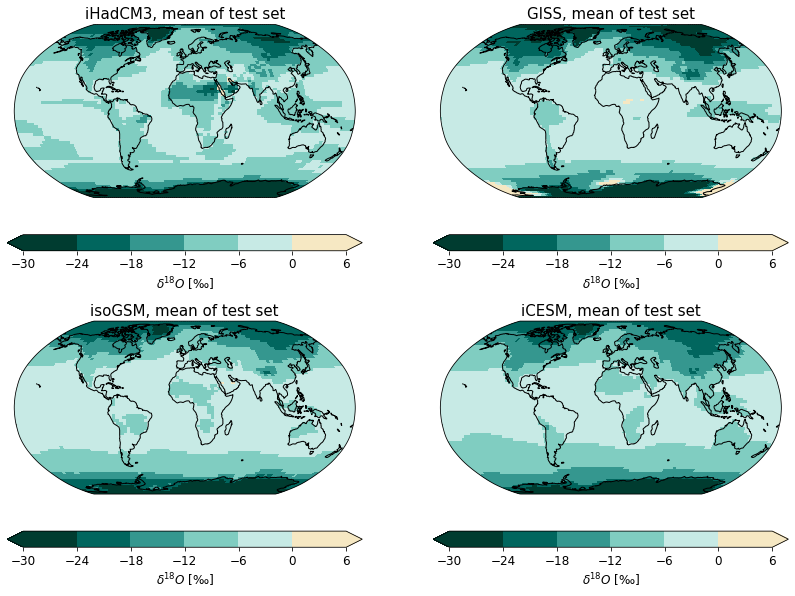

In [17]:
n_rows=2
n_cols=2

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=np.array([n_cols, n_rows])*mean_style["FIGSIZE"], subplot_kw={'projection': mean_style["PROJECTION"]})
for i, key in enumerate(list(conditions.keys())):
    plot_map(ax[i//2,i%2], np.nanmean(gt_l[i][0],axis=(0,1)), descriptions_l[i][0]["DATASET_DESCRIPTION"], mean_style, 
             title=descriptions_l[i][0]["DATASET_DESCRIPTION"]["CLIMATE_MODEL"]+", mean of test set")


plt.show()

c:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


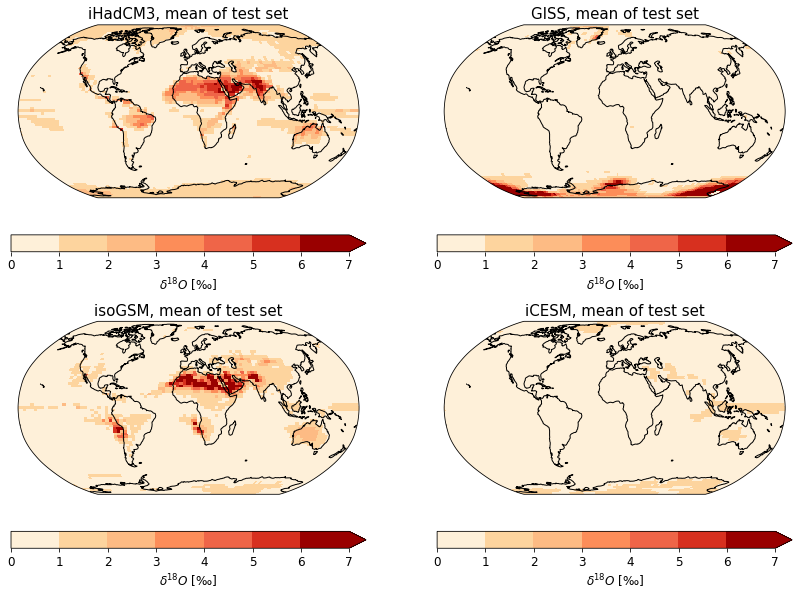

In [18]:
n_rows=2
n_cols=2

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=np.array([n_cols, n_rows])*std_style["FIGSIZE"], subplot_kw={'projection': std_style["PROJECTION"]})
for i, key in enumerate(list(conditions.keys())):
    plot_map(ax[i//2,i%2], np.nanstd(gt_l[i][0],axis=(0,1)), descriptions_l[i][0]["DATASET_DESCRIPTION"], std_style, 
             title=descriptions_l[i][0]["DATASET_DESCRIPTION"]["CLIMATE_MODEL"]+", mean of test set")


plt.show()